# FLAMES Dataset
___

In this project we will work with the simulation data from the FLAMES software. We will try to create a classification model to predict whether or not an agent should launch a missile at a target in a given state. 

## Features

The dataset 'Launches.csv' contains the following features:

- ï..RUNNUMBER_I: Run number
- CASENUMBER_I: Case number
- Time_T: Firing time
- UnitID_I: Unit ID
- UnitLat_F: Unit latitude
- UnitLon_F: Unit longitude
- UnitAlt_F: Unit altitude
- UnitSpd_F: Unit speed
- TargetID_I: Target ID
- TargetLat_F: Target latitude
- TargetLon_F: Target longitude
- TargetAlt_F: Target altitude
- TargetSpd_F: Target speed
- Range_F: Range between unit and target
- UnToTargAz_F: The azimuth at which the unit observes the position (ECR) of the target in its body coordinates (0 = straight forward, 0+ is "to the right")
- UnToTargEl_F: The elevation at which the unit observes the position (ECR) of the target in its body coordinates (0 = straight forward, 0+ is "up")
- TargToUnAz_F: The azimuth at which the target observes the position (ECR) of the unit in its body coordinates (0 = straight forward, 0+ is "to the right")
- TargToUnEl_F: The elevation at which the target observes the position (ECR) of the unit in its body coordinates (0 = straight forward, 0+ is "up")
- Signature_F: Target signature on radar angle of incidence
- DetectableSignature_F: The RCS the target must have (without jamming) in order to be detected.
- KILL: Whether the target was killed or not by the missile

The dataset 'General.csv' contains the following features:

- ALTITUDE: Blue maneuvering altitude
- REDALTITUDE: Red maneuvering altitude
- SPEED: Blue maneuvering speed
- REDSPEED: Red maneuvering speed
- LONB1: Blue aircraft #1 longitude
- LONR1: Red aircraft #1 longitude
- RTRACK: Blue radar track range
- MRANGE: Blue missile range
- RCS: Blue RCS
- ACTIVE: Blue missile activation distance
- FIRERANGE: Blue shot philosophy (in percentage of WEZ)
- RSCAN: Blue radar scan range
- LONB2: Blue aircraft #2 longitude
- LONB3: Blue aircraft #3 longitude
- LONB4: Blue aircraft #4 longitude
- LONB5: Blue aircraft #5 longitude
- LONB6: Blue aircraft #6 longitude
- LONR2: Red aircraft #2 longitude
- LONR3: Red aircraft #3 longitude
- LONR4: Red aircraft #4 longitude
- CAPSPEED: Blue CAP speed
- REDCAPSPEED: Red CAP speed
- CONCEPT: Blue aircraft concept (type)
- SIXAC: Whether there are six aircraft (= 0) or not (=1.00E+08)
- BLUEFIRES: Number of blue missiles fired
- BLUEKILLS: Percentage of blue deaths
- REDFIRES: Number of red missiles fired
- REDKILLS: Percentage of red deaths
- CASENUMBER_I: Case number

## Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the Data

Pay attention to enconding. The file 'Launches.csv' and 'General.csv' was not saved as utf-8 encoding.

In [13]:
df1 = pd.read_csv('../data/Launches.csv', encoding = 'ISO-8859-1')
df2 = pd.read_csv('../data/General.csv', encoding = 'ISO-8859-1')

In [14]:
df1.describe()

,ï..RUNNUMBER_I,CASENUMBER_I,Time_T,UnitID_I,UnitLat_F,UnitLon_F,UnitAlt_F,UnitSpd_F,TargetID_I,TargetLat_F,TargetLon_F,TargetAlt_F,TargetSpd_F,Range_F,UnToTargAz_F,UnToTargEl_F,TargToUnAz_F,TargToUnEl_F,Signature_F
count,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,154692.000000,1.546920e+05,154692.000000,1.546920e+05,154692.000000,154692.000000
mean,3915.803312,131.007357,1611.324209,4.398922,6.306913,-67.767327,10167.859592,350.305829,6.984356,6.480520,-67.764191,9391.622850,337.798428,40781.554236,-7.554365e-01,1.847987,-2.692033e+00,5.750573,-9.464306
std,2058.741247,68.623610,240.814916,2.825265,0.457067,0.553172,1645.546179,49.848901,2.778840,0.472547,0.542026,1766.271991,53.003432,16527.307981,2.181020e+01,10.797064,7.278865e+01,18.663893,10.363845
min,1.000000,1.000000,1081.100006,1.000000,2.065537,-69.401690,1.000000,174.865637,1.000000,1.968664,-69.320335,1.000000,153.607725,351.366984,-4.498409e+01,-44.866891,-1.800000e+02,-89.124070,-30.141585
25%,2217.000000,74.000000,1476.700012,2.000000,6.078306,-68.143527,9019.751405,307.594083,6.000000,6.271143,-68.131242,8305.993615,294.324948,29288.203527,-9.053361e+00,-3.780217,-4.039969e+01,-1.968001,-19.293062
50%,3973.000000,133.000000,1582.500000,4.000000,6.238996,-67.846878,10098.661170,348.072754,8.000000,6.444414,-67.847311,9234.403420,330.253472,38032.221070,-7.660000e-13,-0.576087,-9.570000e-13,0.949578,-10.250233
75%,5736.000000,192.000000,1682.700012,7.000000,6.424819,-67.388553,11413.806500,393.961900,9.000000,6.585798,-67.392607,10476.855373,376.403847,50470.779545,4.819683e+00,7.449124,3.840498e+01,15.109864,-2.051135
max,7200.000000,240.000000,3599.899994,10.000000,9.934430,-65.713304,18288.000000,475.712922,10.000000,10.236843,-65.783456,18288.000000,475.753244,100717.439500,4.498275e+01,44.936981,1.800000e+02,89.911460,65.976965


In [15]:
df1.head().T

,0,1,2,3,4
ï..RUNNUMBER_I,1,1,1,1,1
CASENUMBER_I,1,1,1,1,1
Time_T,1525.100006,1534.0,1538.799988,1589.399994,1592.899994
UnitID_I,1,4,3,4,3
UnitLat_F,5.919206,5.919664,5.942109,6.054956,6.095008
UnitLon_F,-68.025231,-67.2136,-68.217974,-67.132827,-68.263746
UnitAlt_F,11369.67157,11369.60142,11370.42161,11369.63334,11369.75291
UnitSpd_F,399.612602,401.931855,419.69416,280.325126,280.201039
TargetID_I,7,8,7,10,9
TargetLat_F,6.632966,6.632988,6.593564,6.610518,6.50833


In [16]:
df2.head().T

,0,1,2,3,4
ALTITUDE,11416.44259,9320.714881,9112.042574,12768.33488,10227.51556
REDALTITUDE,12185.73286,10836.98776,12265.05348,11306.50944,11067.97257
SPEED,1.475407,1.450666,1.143035,1.272934,0.949747
REDSPEED,1.10234,1.132513,1.298403,1.266443,1.031163
LONB1,-68,-68,-68,-68,-68
LONR1,-68,-68,-68,-68,-68
RTRACK,163573.2454,259575.0683,210678.2916,171942.5543,256828.2055
MRANGE,1.694649,1.416008,1.561416,1.73909,1.537881
RCS,4.61471,4.031576,2.175284,7.905107,6.145032
ACTIVE,25795.86155,26736.43376,26224.26506,25228.29805,27021.95497


**Merging the two dataset by 'CASENUMBER_I' using the features that best fit the purpose of the analysis**

The variables that are more general (those that configure the start of the simulation) will be used in another case of analysis. The variables that do not vary (they are usually configurations decided in befrim or those of the systems and missiles used) along the same simulation (same id_case), will be incorporated in the Dataframe to be analyzed.

In [17]:
df = pd.merge(df1,df2[['RTRACK','MRANGE', 'RCS','ACTIVE','FIRERANGE','RSCAN','CONCEPT','CASENUMBER_I']], on='CASENUMBER_I')
df.head().T

,0,1,2,3,4
ï..RUNNUMBER_I,1,1,1,1,1
CASENUMBER_I,1,1,1,1,1
Time_T,1525.100006,1534.0,1538.799988,1589.399994,1592.899994
UnitID_I,1,4,3,4,3
UnitLat_F,5.919206,5.919664,5.942109,6.054956,6.095008
UnitLon_F,-68.025231,-67.2136,-68.217974,-67.132827,-68.263746
UnitAlt_F,11369.67157,11369.60142,11370.42161,11369.63334,11369.75291
UnitSpd_F,399.612602,401.931855,419.69416,280.325126,280.201039
TargetID_I,7,8,7,10,9
TargetLat_F,6.632966,6.632988,6.593564,6.610518,6.50833


In [18]:
print("Number of rows:", len(df))

Number of rows: 154692


## Exploratory Data Analysis

Summarization and visualization in order to explore the dataset.

### Missing Data

Let's start by checking out missing data. We can use seaborn to create a simple heatmap to see where we are missing data.

In [19]:
df.isnull().any()

ï..RUNNUMBER_I           False
CASENUMBER_I             False
Time_T                   False
UnitID_I                 False
UnitLat_F                False
UnitLon_F                False
UnitAlt_F                False
UnitSpd_F                False
TargetID_I               False
TargetLat_F              False
TargetLon_F              False
TargetAlt_F              False
TargetSpd_F              False
Range_F                  False
UnToTargAz_F             False
UnToTargEl_F             False
TargToUnAz_F             False
TargToUnEl_F             False
Signature_F              False
DetectableSignature_F    False
KILL                     False
RTRACK                   False
MRANGE                   False
RCS                      False
ACTIVE                   False
FIRERANGE                False
RSCAN                    False
CONCEPT                  False
dtype: bool

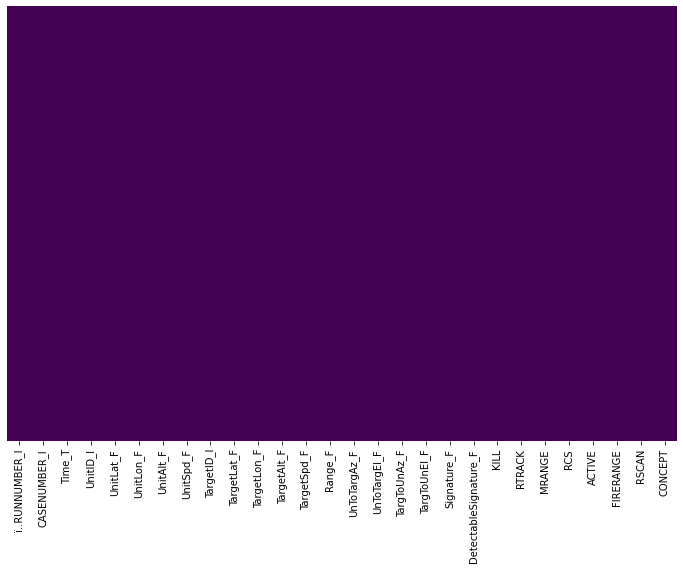

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis'); 

**No data is missing!**

### Feature Engineering

In [21]:
df.head().T

,0,1,2,3,4
ï..RUNNUMBER_I,1,1,1,1,1
CASENUMBER_I,1,1,1,1,1
Time_T,1525.100006,1534.0,1538.799988,1589.399994,1592.899994
UnitID_I,1,4,3,4,3
UnitLat_F,5.919206,5.919664,5.942109,6.054956,6.095008
UnitLon_F,-68.025231,-67.2136,-68.217974,-67.132827,-68.263746
UnitAlt_F,11369.67157,11369.60142,11370.42161,11369.63334,11369.75291
UnitSpd_F,399.612602,401.931855,419.69416,280.325126,280.201039
TargetID_I,7,8,7,10,9
TargetLat_F,6.632966,6.632988,6.593564,6.610518,6.50833


Let's see which variables make the most sense to use in the supervised learning models.

In [22]:
df['radar_track_range'] = df['RTRACK'] #Blue radar track range
df['scan_range'] = df['RSCAN'] #Blue radar scan range
df['distance'] = df['Range_F'] #Range between unit and target
df['missile_act_dist'] = df['ACTIVE'] #Blue missile activation distance
df['delta_altitude'] = df['UnitAlt_F'] - df['TargetAlt_F'] #altitude difference between unit and target
df['delta_speed'] = df['UnitSpd_F'] - df['TargetSpd_F'] #speed difference between unit and target
df['detectable_signature'] = df['DetectableSignature_F'] #The RCS the target must have (without jamming) in order to be detected.
df['missile_range'] = df['MRANGE'] #Blue missile range
df['rcs'] = df['RCS'] #Blue RCS
df['firerange'] = df['FIRERANGE'] #Blue shot philosophy (in percentage of WEZ)
df['concept'] = df['CONCEPT'] #Blue aircraft concept (type)

In [23]:
df['angle_uni_to_tgt'] = round(df['UnToTargAz_F'],2)
df['UnToTargAz_F'].describe()

count    1.546920e+05
mean    -7.554365e-01
std      2.181020e+01
min     -4.498409e+01
25%     -9.053361e+00
50%     -7.660000e-13
75%      4.819683e+00
max      4.498275e+01
Name: UnToTargAz_F, dtype: float64

In [24]:
df['angle_tgt_to_uni'] = round(df['TargToUnAz_F'],2)
df['TargToUnAz_F'].describe()

count    1.546920e+05
mean    -2.692033e+00
std      7.278865e+01
min     -1.800000e+02
25%     -4.039969e+01
50%     -9.570000e-13
75%      3.840498e+01
max      1.800000e+02
Name: TargToUnAz_F, dtype: float64

In [25]:
df['delta_heading'] = 180 + df['angle_uni_to_tgt'] - df['angle_tgt_to_uni']

In [26]:
def aepcdDeg(x):
    if (x < -180.0) or (x > 180.0):
        y = x % 360.0
        if y > 180.0:
            y -= 360.0
        if y < -180.0:
            y += 360.0
        return y
    elif x == -180.0:
        return 180.0
    else:
        return x

In [27]:
df['delta_heading'].apply(aepcdDeg)

0         180.00
1         180.00
2        -155.17
3        -178.51
4         154.52
           ...  
154687   -171.02
154688     31.82
154689     33.81
154690     33.36
154691     28.40
Name: delta_heading, Length: 154692, dtype: float64

In [28]:
df.drop('angle_tgt_to_uni',axis=1, inplace=True)

**Setting the target as last columns**

In [29]:
df['kill'] = df['KILL'] #Whether the target was killed or not by the missile

In [30]:
df.head().T

,0,1,2,3,4
ï..RUNNUMBER_I,1,1,1,1,1
CASENUMBER_I,1,1,1,1,1
Time_T,1525.100006,1534.0,1538.799988,1589.399994,1592.899994
UnitID_I,1,4,3,4,3
UnitLat_F,5.919206,5.919664,5.942109,6.054956,6.095008
UnitLon_F,-68.025231,-67.2136,-68.217974,-67.132827,-68.263746
UnitAlt_F,11369.67157,11369.60142,11370.42161,11369.63334,11369.75291
UnitSpd_F,399.612602,401.931855,419.69416,280.325126,280.201039
TargetID_I,7,8,7,10,9
TargetLat_F,6.632966,6.632988,6.593564,6.610518,6.50833


### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

**Method for converting the Concept to 0 and 1.**

In [31]:
def concept_str_to_int(string):
    if string == 'Generic MULAS':
        return 1
    else:
        return 0

**Method for converting the False and True strings to 0 and 1.**

In [32]:
def kill_str_to_int(string):
    if string == True:
        return 1
    else:
        return 0

In [33]:
df['concept'] = df['concept'].apply(concept_str_to_int)
df['kill'] = df['kill'].apply(kill_str_to_int)

In [34]:
df.head().T

,0,1,2,3,4
ï..RUNNUMBER_I,1,1,1,1,1
CASENUMBER_I,1,1,1,1,1
Time_T,1525.100006,1534.0,1538.799988,1589.399994,1592.899994
UnitID_I,1,4,3,4,3
UnitLat_F,5.919206,5.919664,5.942109,6.054956,6.095008
UnitLon_F,-68.025231,-67.2136,-68.217974,-67.132827,-68.263746
UnitAlt_F,11369.67157,11369.60142,11370.42161,11369.63334,11369.75291
UnitSpd_F,399.612602,401.931855,419.69416,280.325126,280.201039
TargetID_I,7,8,7,10,9
TargetLat_F,6.632966,6.632988,6.593564,6.610518,6.50833


### Slicing Features

In [35]:
df = df.iloc[:,-14:]
df.head()

,radar_track_range,scan_range,distance,missile_act_dist,delta_altitude,delta_speed,detectable_signature,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill
0,163573.2454,98143.94722,79529.36121,25795.86155,-768.70284,74.346287,-34.87006359,1.694649,4.61471,66.158217,1,-0.00,180.00,0
1,163573.2454,98143.94722,79486.49881,25795.86155,-768.91505,76.666028,-34.87960935,1.694649,4.61471,66.158217,1,-0.00,180.00,0
2,163573.2454,98143.94722,75324.71719,25795.86155,-767.97862,94.427345,-32.72056494,1.694649,4.61471,66.158217,1,42.71,204.83,0
3,163573.2454,98143.94722,72298.13278,25795.86155,-768.78616,-44.941697,-36.53008261,1.694649,4.61471,66.158217,1,1.50,181.49,0
4,163573.2454,98143.94722,53391.06962,25795.86155,-768.61199,-45.065788,-40.7873577,1.694649,4.61471,66.158217,1,-25.61,154.52,0


### Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154692 entries, 0 to 154691
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   radar_track_range     154692 non-null  float64
 1   scan_range            154692 non-null  float64
 2   distance              154692 non-null  float64
 3   missile_act_dist      154692 non-null  float64
 4   delta_altitude        154692 non-null  float64
 5   delta_speed           154692 non-null  float64
 6   detectable_signature  154692 non-null  object 
 7   missile_range         154692 non-null  float64
 8   rcs                   154692 non-null  float64
 9   firerange             154692 non-null  float64
 10  concept               154692 non-null  int64  
 11  angle_uni_to_tgt      154692 non-null  float64
 12  delta_heading         154692 non-null  float64
 13  kill                  154692 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 17

In [37]:
df['concept'].value_counts()

0    87048
1    67644
Name: concept, dtype: int64

In [38]:
df['detectable_signature'].sort_values()

149904       -1.#INF00
69918        -1.#INF00
60455        -1.#INF00
114038       -1.#INF00
60491        -1.#INF00
              ...     
38724     -87.33167599
145348    -88.25284683
112950    -88.47737518
153610     -88.5171608
54991     -89.95079193
Name: detectable_signature, Length: 154692, dtype: object

In [39]:
df['detectable_signature'][149904]

' -1.#INF00'

In [40]:
df[df['detectable_signature'] == ' -1.#INF00']

,radar_track_range,scan_range,distance,missile_act_dist,delta_altitude,delta_speed,detectable_signature,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill
100,163573.2454,98143.94722,37332.20895,25795.86155,1747.919508,75.607616,-1.#INF00,1.694649,4.614710,66.158217,1,-26.27,254.98,0
230,163573.2454,98143.94722,40538.26023,25795.86155,-553.590680,55.488927,-1.#INF00,1.694649,4.614710,66.158217,1,2.26,181.68,0
242,163573.2454,98143.94722,42961.87328,25795.86155,342.916600,50.948947,-1.#INF00,1.694649,4.614710,66.158217,1,0.69,180.82,0
243,163573.2454,98143.94722,42592.23411,25795.86155,342.189910,50.000354,-1.#INF00,1.694649,4.614710,66.158217,1,0.35,174.79,0
274,163573.2454,98143.94722,38781.12182,25795.86155,1680.935750,106.473645,-1.#INF00,1.694649,4.614710,66.158217,1,32.35,320.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153824,276602.8968,165961.73810,21052.55104,28883.84418,5171.151659,76.522318,-1.#INF00,1.025355,-9.438878,63.196243,0,31.82,371.59,0
153923,276602.8968,165961.73810,10128.95381,28883.84418,5133.523933,79.278017,-1.#INF00,1.025355,-9.438878,63.196243,0,11.06,59.54,1
154244,157584.1174,94550.47045,22750.98606,20594.67823,2108.913633,-21.005160,-1.#INF00,1.804109,0.729074,52.989009,0,-36.02,301.41,0
154423,157584.1174,94550.47045,54184.17069,20594.67823,1387.734503,99.850588,-1.#INF00,1.804109,0.729074,52.989009,0,-14.85,115.43,0


In [41]:
df = df[df['detectable_signature'] != ' -1.#INF00']

**There is no more corrupted data.**

In [42]:
df[df['detectable_signature'] == ' -1.#INF00']

,radar_track_range,scan_range,distance,missile_act_dist,delta_altitude,delta_speed,detectable_signature,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill


**Let's set the type as a float for this specific column**

In [43]:
df['detectable_signature'] = df['detectable_signature'].astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153606 entries, 0 to 154691
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   radar_track_range     153606 non-null  float64
 1   scan_range            153606 non-null  float64
 2   distance              153606 non-null  float64
 3   missile_act_dist      153606 non-null  float64
 4   delta_altitude        153606 non-null  float64
 5   delta_speed           153606 non-null  float64
 6   detectable_signature  153606 non-null  float64
 7   missile_range         153606 non-null  float64
 8   rcs                   153606 non-null  float64
 9   firerange             153606 non-null  float64
 10  concept               153606 non-null  int64  
 11  angle_uni_to_tgt      153606 non-null  float64
 12  delta_heading         153606 non-null  float64
 13  kill                  153606 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 17.6 MB


In [45]:
df.head()

,radar_track_range,scan_range,distance,missile_act_dist,delta_altitude,delta_speed,detectable_signature,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill
0,163573.2454,98143.94722,79529.36121,25795.86155,-768.70284,74.346287,-34.870064,1.694649,4.61471,66.158217,1,-0.00,180.00,0
1,163573.2454,98143.94722,79486.49881,25795.86155,-768.91505,76.666028,-34.879609,1.694649,4.61471,66.158217,1,-0.00,180.00,0
2,163573.2454,98143.94722,75324.71719,25795.86155,-767.97862,94.427345,-32.720565,1.694649,4.61471,66.158217,1,42.71,204.83,0
3,163573.2454,98143.94722,72298.13278,25795.86155,-768.78616,-44.941697,-36.530083,1.694649,4.61471,66.158217,1,1.50,181.49,0
4,163573.2454,98143.94722,53391.06962,25795.86155,-768.61199,-45.065788,-40.787358,1.694649,4.61471,66.158217,1,-25.61,154.52,0


### Data Visualization

**Class Distribution**

On classification problems you need to know how balanced the class values are.

Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project.

You can quickly get an idea of the distribution of the class attribute in Pandas.

**Checking the balance of the 'kill' and 'concept' columns.**

In [46]:
df['kill'].value_counts()

0    135209
1     18397
Name: kill, dtype: int64

In [47]:
df['concept'].value_counts()

0    86368
1    67238
Name: concept, dtype: int64

In [48]:
balance_kill = df['kill'].value_counts()[1] * 100 /df['kill'].value_counts()[0]
print(f'Number of cases of the Class 1 is {balance_kill:.1f}% of the Class 0')

Number of cases of the Class 1 is 13.6% of the Class 0


In [49]:
balance_concept = df['concept'].value_counts()[1] * 100 /df['concept'].value_counts()[0]
print(f'Number of cases of the 1 is {balance_concept:.1f}% of the Class 0')

Number of cases of the 1 is 77.9% of the Class 0


In [50]:
def kill_int_to_str(integer):
    if integer:
        return 'KILL'
    else:
        return 'NO-KILL'
    
def concept_int_to_str(integer):
    if integer:
        return 'Generic MULAS'
    else:
        return 'Generic SPEAR'

In [51]:
df_old = df.copy()
df_old['kill'] = df['kill'].apply(kill_int_to_str)
df_old['concept'] = df['concept'].apply(concept_int_to_str)

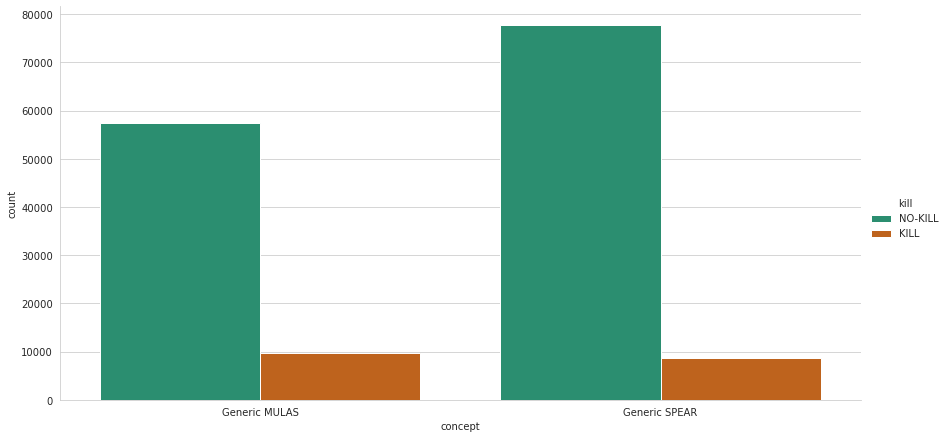

In [52]:
sns.set_style('whitegrid')

ax = sns.catplot(x="concept", hue="kill", data=df_old, kind="count", height=6, aspect=2, palette= 'Dark2')

**Pairplot and Joinplots to compare features with each other** 

Use seaborn on the dataframe to create a pairplot with the hue indicated by the kill column.

<Figure size 864x576 with 0 Axes>

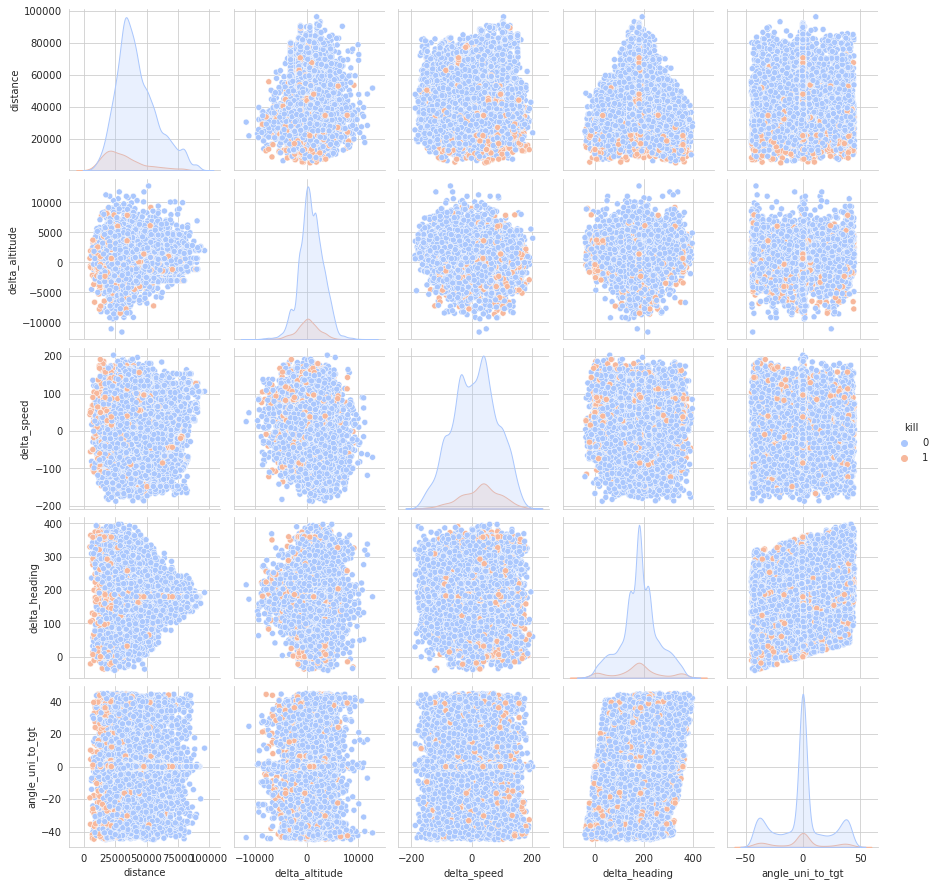

In [58]:
frac=0.10
plt.figure(figsize=(12,8))
sns.pairplot(df[['distance','delta_altitude','delta_speed','delta_heading','angle_uni_to_tgt','kill']].sample(frac=frac), hue='kill',palette='coolwarm');

**Now using jointplot, compare the feature 'distance' with the others.** 

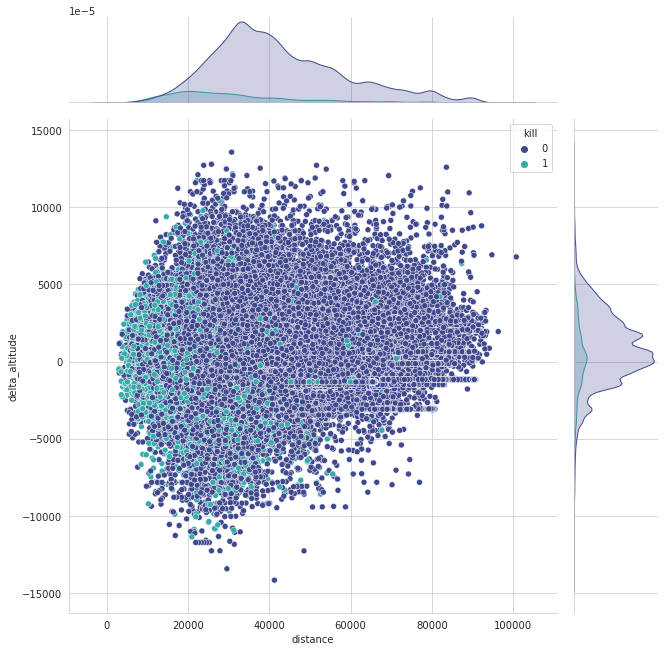

In [59]:
sns.jointplot(data=df, x='distance',y='delta_altitude', hue='kill', height=9, palette='mako');

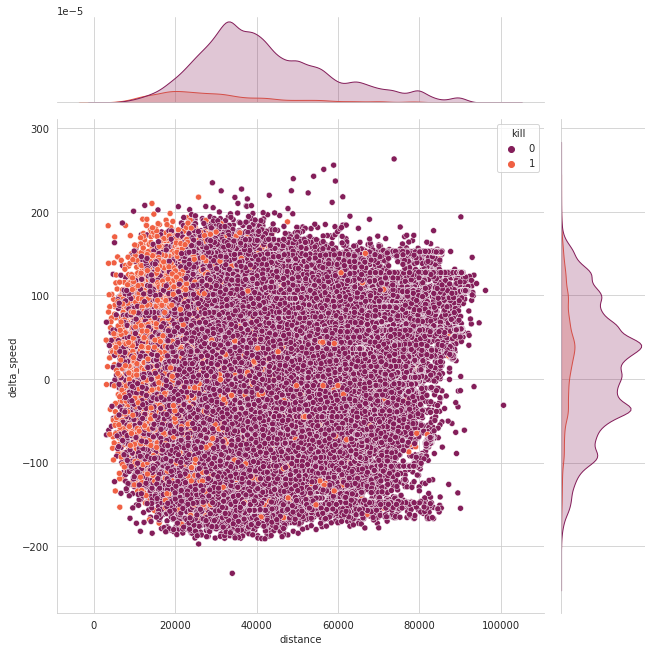

In [60]:
sns.jointplot(data=df, x='distance',y='delta_speed', hue='kill', height=9, palette = 'rocket');

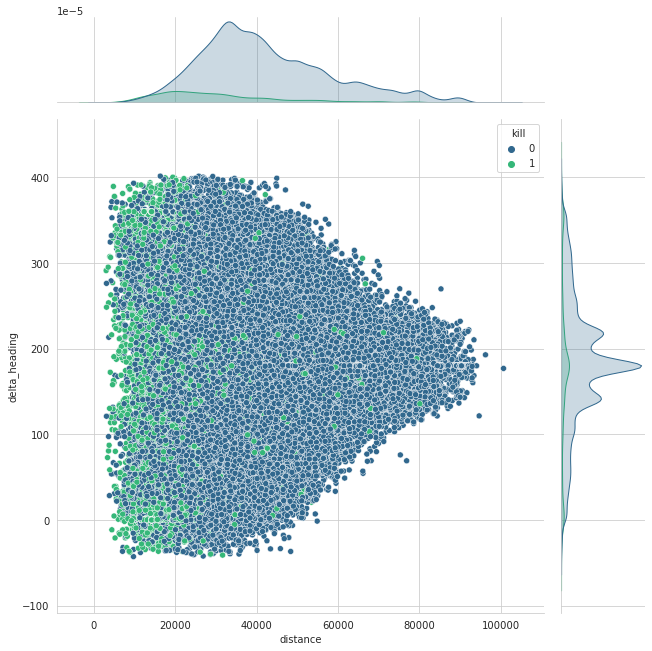

In [61]:
sns.jointplot(data=df, x='distance',y='delta_heading', hue='kill', height=9, palette = 'viridis');

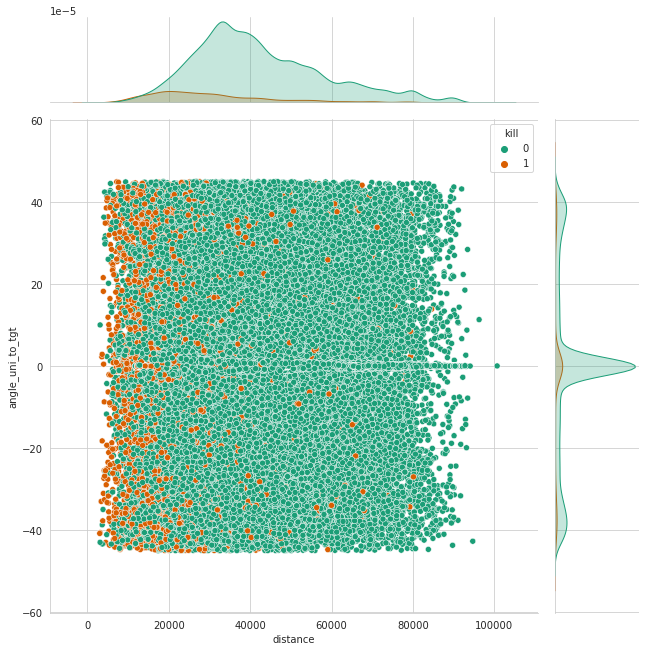

In [62]:
sns.jointplot(data=df, x='distance',y='angle_uni_to_tgt', hue='kill', height=9, palette = 'Dark2');

**Create a kde plot between distance and delta_altitude**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


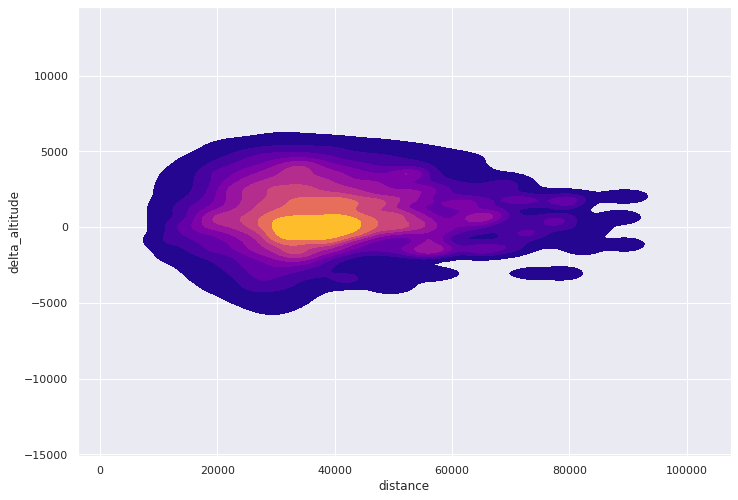

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(df['distance'], df['delta_altitude'], cmap="plasma", shade=True, thresh=0.05);

### Outliers Analysis

When modeling, it is important to clean the data sample to ensure that the observations best represent the problem.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not. Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data.

**Standard Deviation Method**

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

In [72]:
from numpy import mean
from numpy import std
cut_off_parameter = 3

#outliers_cols = ['delta_altitude', 'delta_speed', 'detectable_signature']
outliers_cols = df.columns
outliers = {}
outliers_removed = {}
for idx, col in enumerate(outliers_cols):
    # calculate summary statistics
    data = df[col]
    data_mean, data_std = mean(data), std(data)
    # identify outliers
    cut_off = data_std * cut_off_parameter
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers[col] = [x for x in data if x < lower or x > upper]
    print(f'Variable ({idx+1}): {col}\nIdentified outliers: {len(outliers[col])}')
    # remove outliers
    outliers_removed[col] = [x for x in data if x >= lower and x <= upper]
    print(f'Non-outlier observations: {len(outliers_removed[col])}\n')

Variable (1): radar_track_range
Identified outliers: 0
Non-outlier observations: 153606

Variable (2): scan_range
Identified outliers: 0
Non-outlier observations: 153606

Variable (3): distance
Identified outliers: 296
Non-outlier observations: 153310

Variable (4): missile_act_dist
Identified outliers: 0
Non-outlier observations: 153606

Variable (5): delta_altitude
Identified outliers: 1441
Non-outlier observations: 152165

Variable (6): delta_speed
Identified outliers: 8
Non-outlier observations: 153598

Variable (7): detectable_signature
Identified outliers: 1327
Non-outlier observations: 152279

Variable (8): missile_range
Identified outliers: 0
Non-outlier observations: 153606

Variable (9): rcs
Identified outliers: 0
Non-outlier observations: 153606

Variable (10): firerange
Identified outliers: 0
Non-outlier observations: 153606

Variable (11): concept
Identified outliers: 0
Non-outlier observations: 153606

Variable (12): angle_uni_to_tgt
Identified outliers: 0
Non-outlier obs

**Interquartile Range Method**

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data. The IQR can be used to identify outliers by defining limits on the sample values that are a factor $k$ of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor $k$ is the value 1.5. A factor $k$ of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

**We can calculate the percentiles of a dataset using the *percentile()* NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.**

In [73]:
from numpy import percentile

outliers_cols = df.columns
outliers = {}
outliers_removed = {}
for idx, col in enumerate(outliers_cols):
    # calculate interquartile range
    data = df[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print(f'Variable ({idx+1}): {col}\nPercentiles: 25th = {q25:.3f}, 75th = { q75:.3f}, IQR = {iqr:.3f}')
    # calculate the outlier cutoff
    k = 1.5
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers[col] = [x for x in data if x < lower or x > upper]
    print(f'Identified outliers: {len(outliers[col])}')
    # remove outliers
    outliers_removed[col] = [x for x in data if x >= lower and x <= upper]
    print(f'Non-outlier observations: {len(outliers_removed[col])}\n')

Variable (1): radar_track_range
Percentiles: 25th = 182961.305, 75th = 251175.822, IQR = 68214.517
Identified outliers: 0
Non-outlier observations: 153606

Variable (2): scan_range
Percentiles: 25th = 109776.783, 75th = 150705.493, IQR = 40928.711
Identified outliers: 0
Non-outlier observations: 153606

Variable (3): distance
Percentiles: 25th = 29319.629, 75th = 50553.850, IQR = 21234.221
Identified outliers: 2214
Non-outlier observations: 151392

Variable (4): missile_act_dist
Percentiles: 25th = 18742.024, 75th = 26224.265, IQR = 7482.241
Identified outliers: 0
Non-outlier observations: 153606

Variable (5): delta_altitude
Percentiles: 25th = -655.283, 75th = 2284.227, IQR = 2939.511
Identified outliers: 2944
Non-outlier observations: 150662

Variable (6): delta_speed
Percentiles: 25th = -37.967, 75th = 63.063, IQR = 101.029
Identified outliers: 26
Non-outlier observations: 153580

Variable (7): detectable_signature
Percentiles: 25th = -49.447, 75th = -40.681, IQR = 8.766
Identified

In [74]:
df_wo_out = df.copy()

def remove_outliers(dataframe, col):
    dataframe[col] = round(dataframe[col],2)
    outliers_removed[col] = np.around(outliers_removed[col], 2)
    return dataframe[dataframe[col].isin(outliers_removed[col])]

In [75]:
df_wo_out = remove_outliers(df_wo_out, 'distance')
df_wo_out = remove_outliers(df_wo_out, 'delta_altitude')
df_wo_out = remove_outliers(df_wo_out, 'delta_speed')
df_wo_out = remove_outliers(df_wo_out, 'detectable_signature')
df_wo_out = remove_outliers(df_wo_out, 'angle_uni_to_tgt')
df_wo_out = remove_outliers(df_wo_out, 'delta_heading')

In [76]:
len(df_wo_out)

94559

In [77]:
len(df)

153606

In [78]:
df_wo_out['kill'].value_counts()

0    86689
1     7870
Name: kill, dtype: int64

### Correlation Analysis

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

Variables within a dataset can be related for lots of reasons.

For example:

- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called **multicollinearity**. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.

**Covariance**

Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples. This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

The calculation of the sample covariance is as follows:

$$
\begin{align}
cov(X,Y) = \frac{\sum(x - \mu(X))\sum(y - \mu(Y)}{n - 1}
\end{align}
$$

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

**The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.**

In [79]:
from numpy import cov
covariance = cov(df['distance'], df['kill'])
print(covariance)

[[ 2.73239074e+08 -1.19580000e+03]
 [-1.19580000e+03  1.05423900e-01]]


The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables; in this case, the remaining two values are the same given that we are calculating the covariance for only two variables.

In [80]:
from numpy import cov
# calculate covariance matrix
for idx, col in enumerate(df.columns):
    covariance = cov(df[col], df['kill'])
    print(f'Variable ({idx+1}): {col}\nCovariance = {covariance[1][0]}\n')

Variable (1): radar_track_range
Covariance = 182.14740264031258

Variable (2): scan_range
Covariance = 109.28844124683842

Variable (3): distance
Covariance = -1195.800004999665

Variable (4): missile_act_dist
Covariance = -25.972253254359856

Variable (5): delta_altitude
Covariance = -75.02154056223267

Variable (6): delta_speed
Covariance = 2.0047801929773836

Variable (7): detectable_signature
Covariance = -0.6697008386829021

Variable (8): missile_range
Covariance = -0.005863117981802004

Variable (9): rcs
Covariance = -0.007739867187386386

Variable (10): firerange
Covariance = -0.10760002895587358

Variable (11): concept
Covariance = 0.010970187990030314

Variable (12): angle_uni_to_tgt
Covariance = -0.06549427591309412

Variable (13): delta_heading
Covariance = -0.6530807489702061

Variable (14): kill
Covariance = 0.105423899570744



A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

**Pearson’s Correlation**

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

$$
\begin{align}
r_{X,Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}}
\end{align}
$$

Where:
- $cov(X,Y)$ is the covariance of $X$ and $Y$
- $\sigma_{X}$ and $\sigma_{Y}$ are the standard deviations of $X$ and $Y$

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

**The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.** 

In [81]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr_pearson, _ = pearsonr(df['distance'], df['kill'])
print(f'Pearsons correlation between distance and kill columns: {corr_pearson:.3f}')

Pearsons correlation between distance and kill columns: -0.223


This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

**Compute the pearson correlation matrix**

In [82]:
corr_pearson = df.corr(method='pearson')

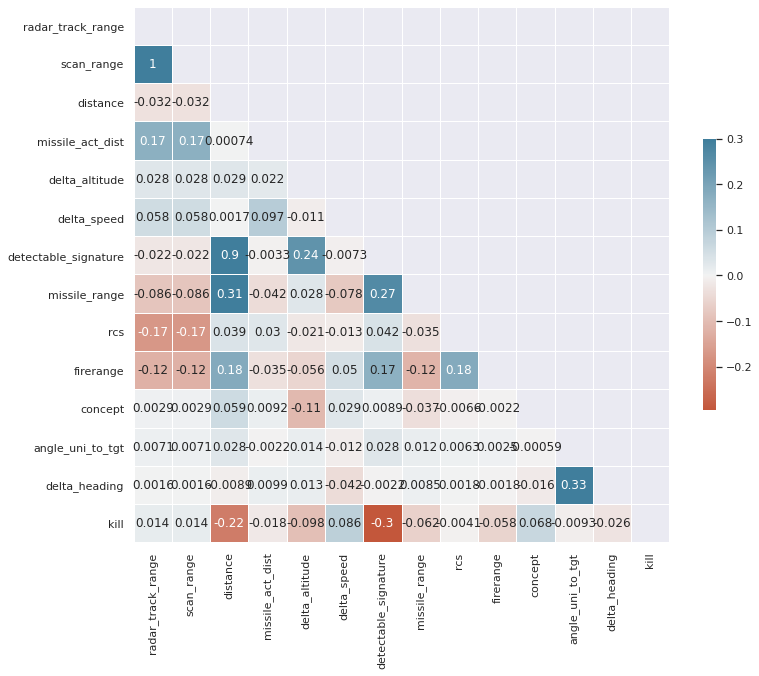

In [83]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [84]:
corr_pearson['kill'].sort_values(ascending=False)

kill                    1.000000
delta_speed             0.086121
concept                 0.068103
radar_track_range       0.013948
scan_range              0.013948
rcs                    -0.004112
angle_uni_to_tgt       -0.009251
missile_act_dist       -0.018373
delta_heading          -0.026080
firerange              -0.057767
missile_range          -0.062130
delta_altitude         -0.098003
distance               -0.222801
detectable_signature   -0.296022
Name: kill, dtype: float64

**Spearman’s Correlation**

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

$$
\begin{align}
\rho_{r_{X},r_{Y}} = \frac{cov(r_{X}, r_{Y})}{\sigma_{r(X)} \sigma_{r(Y)}}
\end{align}
$$
Where:
- $cov(r_{X}, r_{Y})$ is the covariance of ranked data $r_{X}$ and $r_{Y}$
- $\sigma_{r_{X}}$ and $\sigma_{r_{Y}}$ are the standard deviations of $r_{X}$ and $r_{Y}$

A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

**The spearmanr() SciPy function can be used to calculate the Spearman’s correlation coefficient between two data samples with the same length.**

In [85]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr_spearman, _ = spearmanr(df['distance'], df['kill'])
print(f'Spearmans correlation between distance and kill: {corr_spearman:.3f}')

Spearmans correlation between distance and kill: -0.242


As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.

**Compute the spearman correlation matrix**

In [86]:
corr_spearman = df.corr(method='spearman')

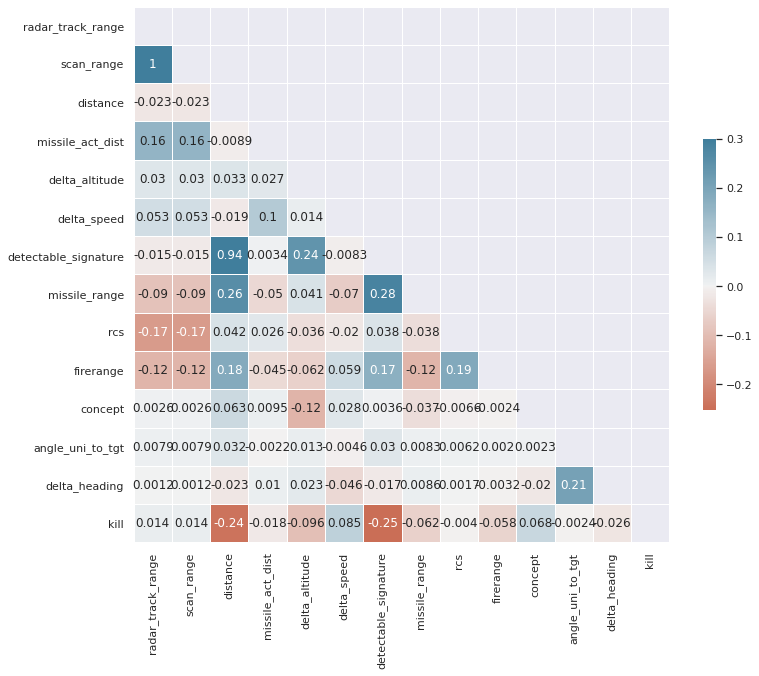

In [87]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [88]:
corr_spearman['kill'].sort_values(ascending=False)

kill                    1.000000
delta_speed             0.085268
concept                 0.068103
radar_track_range       0.014286
scan_range              0.014286
angle_uni_to_tgt       -0.002415
rcs                    -0.003960
missile_act_dist       -0.018160
delta_heading          -0.025698
firerange              -0.058092
missile_range          -0.061932
delta_altitude         -0.095878
distance               -0.241733
detectable_signature   -0.252911
Name: kill, dtype: float64

In [89]:
df.head()

,radar_track_range,scan_range,distance,missile_act_dist,delta_altitude,delta_speed,detectable_signature,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill
0,163573.2454,98143.94722,79529.36121,25795.86155,-768.70284,74.346287,-34.870064,1.694649,4.61471,66.158217,1,-0.00,180.00,0
1,163573.2454,98143.94722,79486.49881,25795.86155,-768.91505,76.666028,-34.879609,1.694649,4.61471,66.158217,1,-0.00,180.00,0
2,163573.2454,98143.94722,75324.71719,25795.86155,-767.97862,94.427345,-32.720565,1.694649,4.61471,66.158217,1,42.71,204.83,0
3,163573.2454,98143.94722,72298.13278,25795.86155,-768.78616,-44.941697,-36.530083,1.694649,4.61471,66.158217,1,1.50,181.49,0
4,163573.2454,98143.94722,53391.06962,25795.86155,-768.61199,-45.065788,-40.787358,1.694649,4.61471,66.158217,1,-25.61,154.52,0


In [90]:
df.drop(['scan_range', 'detectable_signature'], axis = 1, inplace = True)

### Descriptive Statistics Analysis

Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The *describe()* function on the Pandas DataFrame lists 8 statistical properties of each attribute:

- Count
- Mean
- Standard Devaition
- Minimum Value
- 25th Percentile
- 50th Percentile (Median)
- 75th Percentile
- Maximum Value

In [91]:
# Statistical Summary
pd.set_option('display.width', 120)
pd.set_option('precision', 3)

description = df.describe()
print(description)

       radar_track_range    distance  missile_act_dist  delta_altitude  delta_speed  missile_range         rcs  \
count         153606.000  153606.000        153606.000      153606.000   153606.000     153606.000  153606.000   
mean          217375.684   40841.938         22442.613         768.635       12.224          1.502      -0.092   
std            40219.549   16529.945          4353.759        2357.627       71.695          0.291       5.797   
min           150289.183    3023.598         15197.325      -14168.315     -232.368          1.015      -9.942   
25%           182961.305   29319.629         18742.024        -655.283      -37.967          1.233      -5.290   
50%           214907.904   38078.333         22735.841         641.802       16.629          1.514      -0.082   
75%           251175.822   50553.850         26224.265        2284.227       63.063          1.750       5.027   
max           285788.158  100717.439         29828.105       13573.296      263.284     

In [92]:
description.T

,count,mean,std,min,25%,50%,75%,max
radar_track_range,153606.0,217375.684,40219.549,150289.183,182961.305,214907.904,251175.822,285788.158
distance,153606.0,40841.938,16529.945,3023.598,29319.629,38078.333,50553.850,100717.439
missile_act_dist,153606.0,22442.613,4353.759,15197.325,18742.024,22735.841,26224.265,29828.105
delta_altitude,153606.0,768.635,2357.627,-14168.315,-655.283,641.802,2284.227,13573.296
delta_speed,153606.0,12.224,71.695,-232.368,-37.967,16.629,63.063,263.284
missile_range,153606.0,1.502,0.291,1.015,1.233,1.514,1.750,1.987
rcs,153606.0,-0.092,5.797,-9.942,-5.290,-0.082,5.027,9.717
firerange,153606.0,60.244,5.737,50.153,55.356,60.569,65.243,69.960
concept,153606.0,0.438,0.496,0.000,0.000,0.000,1.000,1.000
angle_uni_to_tgt,153606.0,-0.762,21.805,-44.980,-9.010,0.000,4.630,44.980


In [93]:
df.head().T

,0,1,2,3,4
radar_track_range,163573.245,163573.245,163573.245,163573.245,163573.245
distance,79529.361,79486.499,75324.717,72298.133,53391.070
missile_act_dist,25795.862,25795.862,25795.862,25795.862,25795.862
delta_altitude,-768.703,-768.915,-767.979,-768.786,-768.612
delta_speed,74.346,76.666,94.427,-44.942,-45.066
missile_range,1.695,1.695,1.695,1.695,1.695
rcs,4.615,4.615,4.615,4.615,4.615
firerange,66.158,66.158,66.158,66.158,66.158
concept,1.000,1.000,1.000,1.000,1.000
angle_uni_to_tgt,-0.000,-0.000,42.710,1.500,-25.610


### Skewness and Kurtosis of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.

Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models.

You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [94]:
# Skewness for each attribute
skewness = round(df.skew(),3)
print(skewness)

radar_track_range    0.045
distance             0.674
missile_act_dist     0.009
delta_altitude      -0.073
delta_speed         -0.137
missile_range       -0.036
rcs                  0.001
firerange           -0.058
concept              0.251
angle_uni_to_tgt     0.013
delta_heading       -0.054
kill                 2.342
dtype: float64


The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is referred to as skewed.

Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center.

You can calculate the kurtosis of each attribute using the kurt() function on the Pandas DataFrame.

In [95]:
# Kurtosis for each attribute
kurtosis = round(df.kurt(),3)
print(kurtosis)

radar_track_range   -1.228
distance             0.114
missile_act_dist    -1.213
delta_altitude       1.143
delta_speed         -0.526
missile_range       -1.219
rcs                 -1.223
firerange           -1.170
concept             -1.937
angle_uni_to_tgt    -0.288
delta_heading        0.234
kill                 3.486
dtype: float64


"When both skewness and kurtosis are zero (a situation that researchers are very unlikely to ever encounter), the pattern of responses is considered a normal distribution. A general guideline for skewness is that if the number is greater than +1 or lower than –1, this is an indication of a substantially skewed distribution. For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat. Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal." (Hair et al., 2017, p. 61).

Great! Our data is ready for our model!

In [96]:
df.head().T

,0,1,2,3,4
radar_track_range,163573.245,163573.245,163573.245,163573.245,163573.245
distance,79529.361,79486.499,75324.717,72298.133,53391.070
missile_act_dist,25795.862,25795.862,25795.862,25795.862,25795.862
delta_altitude,-768.703,-768.915,-767.979,-768.786,-768.612
delta_speed,74.346,76.666,94.427,-44.942,-45.066
missile_range,1.695,1.695,1.695,1.695,1.695
rcs,4.615,4.615,4.615,4.615,4.615
firerange,66.158,66.158,66.158,66.158,66.158
concept,1.000,1.000,1.000,1.000,1.000
angle_uni_to_tgt,-0.000,-0.000,42.710,1.500,-25.610


### Save the data in csv

In [97]:
df

,radar_track_range,distance,missile_act_dist,delta_altitude,delta_speed,missile_range,rcs,firerange,concept,angle_uni_to_tgt,delta_heading,kill
0,163573.245,79529.361,25795.862,-768.703,74.346,1.695,4.615,66.158,1,-0.00,180.00,0
1,163573.245,79486.499,25795.862,-768.915,76.666,1.695,4.615,66.158,1,-0.00,180.00,0
2,163573.245,75324.717,25795.862,-767.979,94.427,1.695,4.615,66.158,1,42.71,204.83,0
3,163573.245,72298.133,25795.862,-768.786,-44.942,1.695,4.615,66.158,1,1.50,181.49,0
4,163573.245,53391.070,25795.862,-768.612,-45.066,1.695,4.615,66.158,1,-25.61,154.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154687,157584.117,66457.620,20594.678,215.925,29.628,1.804,0.729,52.989,0,5.42,188.98,0
154688,157584.117,33792.757,20594.678,1153.012,65.506,1.804,0.729,52.989,0,-16.64,31.82,0
154689,157584.117,33652.873,20594.678,-138.336,102.582,1.804,0.729,52.989,0,0.38,33.81,0
154690,157584.117,36588.691,20594.678,1915.020,102.301,1.804,0.729,52.989,0,0.34,33.36,0


In [99]:
df.to_csv('../data/df.csv', index=False)